In [3]:
#Import all required libraries to create a Decission Trees Classifier Model
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [4]:
# Load the data set
Data = pd.read_csv(r"C:\Users\Vinoth\Dropbox\PC\Desktop\HOPE AI\Machine Learning\Classification_Models\DataSets\Social_Network_Ads.csv")

In [5]:
Data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
Data.shape

(400, 5)

## To know more about the data please refer the Exploratory Data Analysis on Social Network Ads DataSet.ipynb file

In [7]:
#Convert the Nominal categorical data of "Gender" column to Numeric values

Data = pd.get_dummies(Data,drop_first=True)

In [8]:
Data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [9]:
Data.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [10]:
# Arrange the columns for better visualization and also we can drop User ID colum as it doesn't makes any sense
Data = Data.loc[:,['Gender_Male','Age', 'EstimatedSalary','Purchased']]

In [11]:
Data

,Gender_Male,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [12]:
# Let's Seperate dependent and independent variables

independent = Data[['Gender_Male','Age', 'EstimatedSalary']]
dependent = Data[['Purchased']]

In [13]:
dependent.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [14]:
independent.head()

,Gender_Male,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [15]:
# Standardize the data
# Std =StandardScaler()
# independent_trsm = Std.fit_transform(independent)


In [16]:
# independent_trsm.shape

In [17]:
# independent_trsm

In [18]:
# Lets Split Train and Test Data

X_Train,X_Test,Y_Train,Y_Test = train_test_split(independent,dependent,random_state=0,test_size=0.30)

In [19]:
# Lets Create the Model using training data and default parameters
DecisionTreeClassifier_Model = DecisionTreeClassifier()
DecisionTreeClassifier_Model.fit(X_Train,Y_Train)

DecisionTreeClassifier()

In [20]:
# Lets Test the model using the Test Data
Y_Predicted = DecisionTreeClassifier_Model.predict(X_Test)

In [21]:
# Lets check the performance of the model using confusion Matrix 
confusion_matrix(Y_Predicted,Y_Test)

array([[71,  7],
       [ 8, 34]], dtype=int64)

In [22]:
# importing the classification report function from sklearn.metrics module
from sklearn.metrics import classification_report

In [23]:
clf_report =classification_report(Y_Predicted,Y_Test)

In [24]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.90      0.91      0.90        78
           1       0.83      0.81      0.82        42

    accuracy                           0.88       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.87      0.88      0.87       120



In [25]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [26]:
# Initializing the model params for Decision Tree Classifier to pass it as input for gridsearch CV
model_Params = {'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[50,100,200],'min_samples_split':[2,4,6],
                'max_features':['auto','sqrt','log2'],}

In [27]:
# Invoking the gridsearch CV and pasing the appropriate parameters
import multiprocessing
n_jobs = multiprocessing.cpu_count()-1
DecisionTree_Classifier_Model_GridSearch = GridSearchCV(DecisionTreeClassifier(),model_Params,scoring='f1',refit=True,n_jobs=n_jobs,verbose=2)

In [28]:
# Lets fit the GRID Search CV to the training data
import warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)
DecisionTree_Classifier_Model_GridSearch.fit(X_Train,Y_Train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=19,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [50, 100, 200],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6],
                         'splitter': ['best', 'random']},
             scoring='f1', verbose=2)

In [ ]:
# Best Parameter combination that has performed high than other combinations
DecisionTree_Classifier_Model_GridSearch.best_params_

In [30]:
# Best Score that training model has performed from the parameter combinations
DecisionTree_Classifier_Model_GridSearch.best_score_

0.8390429390429389

In [31]:
# Loading the crsoss validation results to the dataframe
Df = pd.DataFrame.from_dict(DecisionTree_Classifier_Model_GridSearch.cv_results_)

In [32]:
Df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009603,0.003205,0.006400,0.003200,gini,50,auto,2,best,"{'criterion': 'gini', 'max_depth': 50, 'max_fe...",0.756757,0.750000,0.731707,0.851064,0.871795,0.792265,0.057440,36
1,0.009602,0.003206,0.004805,0.003923,gini,50,auto,2,random,"{'criterion': 'gini', 'max_depth': 50, 'max_fe...",0.705882,0.731707,0.697674,0.769231,0.650000,0.710899,0.039356,157
2,0.012012,0.005067,0.004003,0.003577,gini,50,auto,4,best,"{'criterion': 'gini', 'max_depth': 50, 'max_fe...",0.684211,0.756757,0.800000,0.857143,0.810811,0.781784,0.058310,49
3,0.008006,0.005060,0.001600,0.003200,gini,50,auto,4,random,"{'criterion': 'gini', 'max_depth': 50, 'max_fe...",0.769231,0.500000,0.857143,0.761905,0.722222,0.722100,0.119474,153
4,0.009600,0.003202,0.004801,0.003920,gini,50,auto,6,best,"{'criterion': 'gini', 'max_depth': 50, 'max_fe...",0.666667,0.684211,0.780488,0.857143,0.705882,0.738878,0.070724,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.005222,0.003484,0.002427,0.002942,log_loss,200,log2,2,random,"{'criterion': 'log_loss', 'max_depth': 200, 'm...",0.829268,0.685714,0.744186,0.800000,0.850000,0.781834,0.059805,48
158,0.002815,0.002714,0.002403,0.002944,log_loss,200,log2,4,best,"{'criterion': 'log_loss', 'max_depth': 200, 'm...",0.647059,0.685714,0.731707,0.761905,0.736842,0.712645,0.040993,156
159,0.001603,0.003205,0.001603,0.003205,log_loss,200,log2,4,random,"{'criterion': 'log_loss', 'max_depth': 200, 'm...",0.769231,0.769231,0.769231,0.684211,0.736842,0.745749,0.033228,128
160,0.001603,0.003205,0.001600,0.003200,log_loss,200,log2,6,best,"{'criterion': 'log_loss', 'max_depth': 200, 'm...",0.769231,0.780488,0.818182,0.857143,0.736842,0.792377,0.041525,35


In [33]:
# Now test the model from the best hyperparameter that we have got from GRID Serach CV
Predicted_Y = DecisionTree_Classifier_Model_GridSearch.predict(X_Test)

In [34]:
confusion_matrix(Y_Test,Y_Predicted)

array([[71,  8],
       [ 7, 34]], dtype=int64)

In [35]:
Final_report = classification_report(Y_Test,Y_Predicted)

In [36]:
# Final Report for the tested data against the best parameters
print(Final_report)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90        79
           1       0.81      0.83      0.82        41

    accuracy                           0.88       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.88      0.88      0.88       120



In [1]:
from mpl_toolkits import mplot3d

In [38]:
plt.style.use('seaborn-poster')

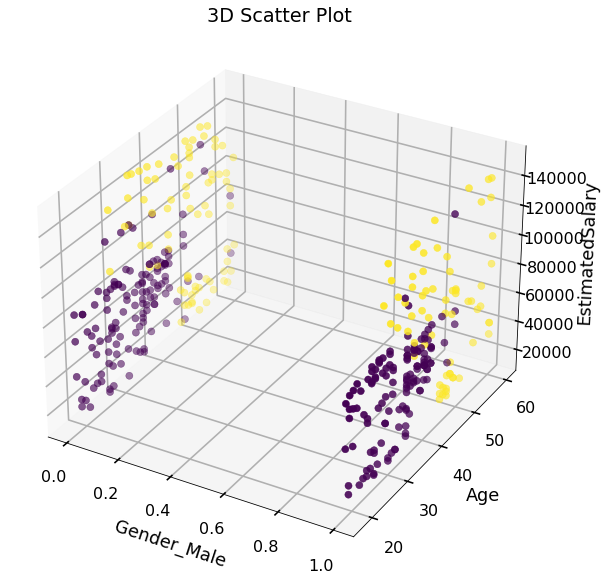

In [39]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(independent['Gender_Male'], independent['Age'], independent["EstimatedSalary"], c = dependent, s = 50,data=Data)
ax.set_title('3D Scatter Plot')

# Set axes label
ax.set_xlabel('Gender_Male', labelpad=20)
ax.set_ylabel('Age', labelpad=20)
ax.set_zlabel('EstimatedSalary', labelpad=20)

plt.show()

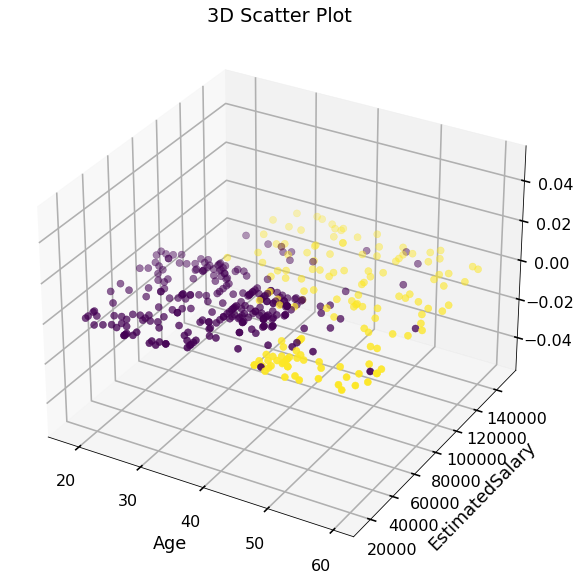

In [40]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(independent['Age'], independent["EstimatedSalary"], c = dependent, s = 50,data=Data)
ax.set_title('3D Scatter Plot')

# Set axes label
ax.set_xlabel('Age', labelpad=20)
ax.set_ylabel('EstimatedSalary', labelpad=20)
#ax.set_zlabel('EstimatedSalary', labelpad=20)

plt.show()

In [41]:
pickle.dump(DecisionTree_Classifier_Model_GridSearch,open(r"C:\Users\Vinoth\Dropbox\PC\Desktop\HOPE AI\Machine Learning\Classification_Models\Final_Model\DecisionTree_Classifier_Model_GridSearch_Final.sav",'wb'))